In [76]:
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

# Importação e Exportação na União Europeia

## <font color='red'>Entrega 1</font>


**O que é a União Europeia (UE) e como ela afeta importação e exportação?**

   A União Europeia é uma união política e econômica que atualmente consiste de 28 países. Esta união teve seu início em 1951 com o tratado de Paris e consistia de somente 6 países. No decorrer do tempo, foi evoluindo e crescendo até que em 1992 foi assinado o Tratado de Maastricht e consequentemente em 1993 a atual União Europeia foi efetivamente formada. Neste meio tempo diversos países se juntaram para formar esta organização que tem como principais objetivos manter a paz, promover inclusão e proporcionar o desenvolvimento tanto econômico quanto social. Um dos pilares de uma economia saudável é a importação e a exportação. Dentro da UE quando um país membro importa um produto de outro não são postas tarifas, impostos nem quotas. Isto, na teoria, leva todos os países membros a um crescimento econômico saudável. Por esta razão é interessante analisar os reais impactos que a UE tem na importação e exportação em países membros. 

   Contudo, para se fazer esta analise é importante considerar os pactos econômicos existentes entre a UE e países da Europa que não fazem parte da UE que impactam significativamente a importação e exportação. Um deles é a área de livre comercio europeia. Neste pacto estão incluídos Noruega, Suíça, Liechtenstein e Islândia. Estes países podem comprar e vender produtos com membros da UE sem tarifas, impostos nem quotas. Além disso este acordo prevê que estes países possam moldar seus próprios acordos com países que não fazem parte da UE. Outro exemplo é a união aduaneira. Os países que fazem parte deste acordo são Turquia, San Marino, Mônaco e Andorra. A união aduaneira é extremamente semelhante a área livre de comercio, no entanto estes 4 países não estão livres para negociar pactos com países não membros. A própria UE determina as tarifas, impostos e quotas que vão ser cobradas. Existem alguns outros exemplos, mas estes vão ser os principais que vão ser usados para fazer a análise.
   
   Os países atualmente membros da UE são Alemanha, Áustria, Bélgica, Bulgária, Chipre, Croácia, Dinamarca, Eslováquia, Eslovênia, Espanha, Estônia, Finlândia, França, Grécia, Holanda, Hungria, Irlanda, Itália, Letônia, Lituânia, Luxemburgo, Malta, Polônia, Portugal, Reino Unido, República Tcheca, Romênia e Suécia.

**Pergunta:** Que impacto que membros da União Europeia e países europeus com acordos com a UE sentem nas suas importações e exportações devido aos acordos formados e como que o PIB de um país influencia nisto?

**Hipótese:** Países com acordos de importação e exportação com a UE e os países membros da UE ambos sentirão um impacto significativo na quantidade de importação e exportação devido ao beneficio econômico que este propicia. Adicionalmente, países com baixo PIB que ingressaram nestes acordos terão um numero significativamente maior de importação pois produtos de outros paises que estão na UE entrarão com preço menor.

Para responder esta pergunta definitivamente serão utilizados os dados a seguir:

# Dados

* Para esta análise foram coletados 3 diferentes tipos de dados do site https://www.gapminder.org/:

    1. Exportação por porcentagem de PIB
    2. Importação por porcentagem de PIB
    3. PIB per capita

Com isto é possivel montar um data frame destes dados. É iportante apontar que usaremos o ano de 2004 como referência e ponto de comparação pois neste ano 10 países novos entraram na UE.

Estes dados serão utilizados para criar gráficos que comparam o crescimento tanto da importação quanto da exportação ambos de países da UE e de países que não tem pactos com esta. Além disso, Tabelas poderão ser montadas para comparar o PIB com a importação e exportação.

Inicia-se lendo os arquivos de excel e salvando-os em uma variavel.

In [77]:
Expo = pd.read_excel('exports_percent_of_gdp.xlsx')
Impo = pd.read_excel('imports_percent_of_gdp.xlsx')
PIB = pd.read_excel('income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')

Agora são escolhidos os anos que serão analisados. Já que 10 paises novos entraram na UE em 2004 é interessante analisar o impacto que estes tiveram nos outros paises da UE e neles mesmos quando comparados a paises que nao fazem parte dos pactos econômicos. Por esta razão os dados são pegos desde 2000 até 2008.

In [78]:
i=0
tempo = ['country']
ano_inicial = 2000

while i < 9:
    tempo.append(ano_inicial)
    ano_inicial += 1
    i+=1

Expo = Expo[tempo]
Impo = Impo[tempo]
PIB = PIB[tempo]

## <font color='blue'>Selecionando somente Europa</font>

Para separar somente paises da Europa foi pego uma lista na internet com todos os países da Europa e com isto foi criada uma lista para os dados então poderem ser selecionados de forma rápida e facil. Nota-se também que para isto poder dar certo o nome de alguns países foram alterados para não conter espaços.

In [79]:
Europe = 'Albania, Andorra, Armenia, Austria, Azerbajan, Belarus, Belgium, Bosnia, Bulgaria, Croatia, Cyprus, Czech, Denmark, Estonia, Finland, France, Georgia, Germany, Gibraltar, Greece, Hungary, Iceland, Ireland, Italy, Kazakhstan, Kosovo, Latvia, Lichenstein, Lithua, Luxembourg, Macedonia, Malta, Monaco, Moldova, Netherlands, Norway, Poland, Portugal, Romania, Russia, SanMarino, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turkey, Ukraine, UnitedKingdom'
Europe = Europe.replace(' ', '')
EuropeList = Europe.split(',')

ExpoEurope = Expo[Expo.country.isin(EuropeList)]
ImpoEurope = Impo[Impo.country.isin(EuropeList)]
PIBEurope = PIB[PIB.country.isin(EuropeList)]


Agora é adicionado uma variavel qualitativa para separar países da União Europeia e os fora dela. A lista dos países da União Europeia foi pego da mesma forma da lista dos países europeus e então foi utilizado o 'for' para poder pegar a frase necessaria para effetivamente adicionar uma nova coluna com a distinção de UE ou não. Contudo é crucial ressaltar que os seguintes países foram adicionados no grupo da UE mesmo não fazendo parte dela devido aos pactos citados na introdução: Islândia, Liechtenstein, Noruega, Suiça, Turquia, San Marino, Andorra e Mónaco. Todos os pactos entre estes países e a UE foram feitos antes do ano 2000, portanto sendo importante analisá-los também. Adicionalmente, três países que atualmente fazem parte da UE foram retirados da lista pois estes ingressaram ou no ano de 2007 como é o caso da Bulgaria e Romênia ou em 2013, caso da Croácia.

In [80]:
EUCountries = ['Andorra', 'Austria', 'Belgium', 'Cyprus', 'Czech', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'SanMarino', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'UnitedKingdom']
Statement = ''
for i in EUCountries:
    Statement += '(ExpoEurope.country == ' "'" + i + "'"')|'
Statement = ''
for i in EUCountries:
    Statement += '(ImpoEurope.country == ' "'" + i + "'"')|'
Statement = ''
for i in EUCountries:
    Statement += '(PIBEurope.country == ' "'" + i + "'"')|'
    

Statement = Statement.strip(Statement[len(Statement)-1])

#print(Statement)



StatementExpo = (ExpoEurope.country == 'Andorra')|(ExpoEurope.country == 'Austria')|(ExpoEurope.country == 'Belgium')|(ExpoEurope.country == 'Cyprus')|(ExpoEurope.country == 'Czech')|(ExpoEurope.country == 'Denmark')|(ExpoEurope.country == 'Estonia')|(ExpoEurope.country == 'Finland')|(ExpoEurope.country == 'France')|(ExpoEurope.country == 'Germany')|(ExpoEurope.country == 'Greece')|(ExpoEurope.country == 'Hungary')|(ExpoEurope.country == 'Iceland')|(ExpoEurope.country == 'Ireland')|(ExpoEurope.country == 'Italy')|(ExpoEurope.country == 'Latvia')|(ExpoEurope.country == 'Liechtenstein')|(ExpoEurope.country == 'Lithuania')|(ExpoEurope.country == 'Luxembourg')|(ExpoEurope.country == 'Malta')|(ExpoEurope.country == 'Monaco')|(ExpoEurope.country == 'Netherlands')|(ExpoEurope.country == 'Norway')|(ExpoEurope.country == 'Poland')|(ExpoEurope.country == 'Portugal')|(ExpoEurope.country == 'SanMarino')|(ExpoEurope.country == 'Slovakia')|(ExpoEurope.country == 'Slovenia')|(ExpoEurope.country == 'Spain')|(ExpoEurope.country == 'Sweden')|(ExpoEurope.country == 'Switzerland')|(ExpoEurope.country == 'Turkey')|(ExpoEurope.country == 'UnitedKingdom')
StatementImpo = (ImpoEurope.country == 'Andorra')|(ImpoEurope.country == 'Austria')|(ImpoEurope.country == 'Belgium')|(ImpoEurope.country == 'Cyprus')|(ImpoEurope.country == 'Czech')|(ImpoEurope.country == 'Denmark')|(ImpoEurope.country == 'Estonia')|(ImpoEurope.country == 'Finland')|(ImpoEurope.country == 'France')|(ImpoEurope.country == 'Germany')|(ImpoEurope.country == 'Greece')|(ImpoEurope.country == 'Hungary')|(ImpoEurope.country == 'Iceland')|(ImpoEurope.country == 'Ireland')|(ImpoEurope.country == 'Italy')|(ImpoEurope.country == 'Latvia')|(ImpoEurope.country == 'Liechtenstein')|(ImpoEurope.country == 'Lithuania')|(ImpoEurope.country == 'Luxembourg')|(ImpoEurope.country == 'Malta')|(ImpoEurope.country == 'Monaco')|(ImpoEurope.country == 'Netherlands')|(ImpoEurope.country == 'Norway')|(ImpoEurope.country == 'Poland')|(ImpoEurope.country == 'Portugal')|(ImpoEurope.country == 'SanMarino')|(ImpoEurope.country == 'Slovakia')|(ImpoEurope.country == 'Slovenia')|(ImpoEurope.country == 'Spain')|(ImpoEurope.country == 'Sweden')|(ImpoEurope.country == 'Switzerland')|(ImpoEurope.country == 'Turkey')|(ImpoEurope.country == 'UnitedKingdom')
StatementPIB = (PIBEurope.country == 'Andorra')|(PIBEurope.country == 'Austria')|(PIBEurope.country == 'Belgium')|(PIBEurope.country == 'Cyprus')|(PIBEurope.country == 'Czech')|(PIBEurope.country == 'Denmark')|(PIBEurope.country == 'Estonia')|(PIBEurope.country == 'Finland')|(PIBEurope.country == 'France')|(PIBEurope.country == 'Germany')|(PIBEurope.country == 'Greece')|(PIBEurope.country == 'Hungary')|(PIBEurope.country == 'Iceland')|(PIBEurope.country == 'Ireland')|(PIBEurope.country == 'Italy')|(PIBEurope.country == 'Latvia')|(PIBEurope.country == 'Liechtenstein')|(PIBEurope.country == 'Lithuania')|(PIBEurope.country == 'Luxembourg')|(PIBEurope.country == 'Malta')|(PIBEurope.country == 'Monaco')|(PIBEurope.country == 'Netherlands')|(PIBEurope.country == 'Norway')|(PIBEurope.country == 'Poland')|(PIBEurope.country == 'Portugal')|(PIBEurope.country == 'SanMarino')|(PIBEurope.country == 'Slovakia')|(PIBEurope.country == 'Slovenia')|(PIBEurope.country == 'Spain')|(PIBEurope.country == 'Sweden')|(PIBEurope.country == 'Switzerland')|(PIBEurope.country == 'Turkey')|(PIBEurope.country == 'UnitedKingdom')
ExpoEurope['EU'] = np.select([StatementExpo], [1])
ImpoEurope['EU'] = np.select([StatementImpo], [1])
PIBEurope['EU'] = np.select([StatementPIB], [1])





/Users/EduardoGoncalves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/EduardoGoncalves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/EduardoGoncalves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

A seguir, muda-se o índice do data frame para facilitar o processo.

In [81]:
ExpoEurope = ExpoEurope.set_index('country')
ImpoEurope = ImpoEurope.set_index('country')
PIBEurope = PIBEurope.set_index('country')

Em seguida o data frame é separado em 2, um somente com os países da UE e outro somente com os países que não fazem parte da UE.

In [82]:
ExpoEU = ExpoEurope[(ExpoEurope.EU == 1)]
ExpoRestEurope = ExpoEurope[(ExpoEurope.EU == 0)]

ImpoEU = ImpoEurope[(ImpoEurope.EU == 1)]
ImpoRestEurope = ImpoEurope[(ImpoEurope.EU == 0)]

PIBEU = PIBEurope[(PIBEurope.EU == 1)]
PIBRestEurope = PIBEurope[(PIBEurope.EU == 0)]

Para ter noção de comparação e poder verificar parte da hipótese é importante ter noção da relação entre importação, exportação e PIB. Logo, os dados são separados em 3 pontos cuciais: 2000, 2004 e 2008. Estas datas foram escolhidas com a intenção de mostrar a variação devido a entrada dos 10 países na UE em 2004. Contudo, outras datas poderiam ser escolhidas para mostrar o mesmo efeito.

In [83]:
##### 2000 #####

ExpoEU_2000 = ExpoEU.iloc[:, 0].to_frame()
ImpoEU_2000 = ImpoEU.iloc[:, 0].to_frame()
PIBEU_2000 = PIBEU.iloc[:, 0].to_frame()
PIBEU_2000 = PIBEU_2000.add_suffix('_PIB')

ExpoRestEurope_2000 = ExpoRestEurope.iloc[:, 0].to_frame()
ImpoRestEurope_2000 = ImpoRestEurope.iloc[:, 0].to_frame()
PIBRestEurope_2000 = PIBRestEurope.iloc[:, 0].to_frame()
PIBRestEurope_2000 = PIBRestEurope_2000.add_suffix('_PIB')


##### 2004 #####

ExpoEU_2004 = ExpoEU.iloc[:, 4].to_frame()
ImpoEU_2004 = ImpoEU.iloc[:, 4].to_frame()
PIBEU_2004 = PIBEU.iloc[:, 4].to_frame()
PIBEU_2004 = PIBEU_2004.add_suffix('_PIB')

ExpoRestEurope_2004 = ExpoRestEurope.iloc[:, 4].to_frame()
ImpoRestEurope_2004 = ImpoRestEurope.iloc[:, 4].to_frame()
PIBRestEurope_2004 = PIBRestEurope.iloc[:, 4].to_frame()
PIBRestEurope_2004 = PIBRestEurope_2004.add_suffix('_PIB')


##### 2008 #####

ExpoEU_2008 = ExpoEU.iloc[:, 8].to_frame()
ImpoEU_2008 = ImpoEU.iloc[:, 8].to_frame()
PIBEU_2008 = PIBEU.iloc[:, 8].to_frame()
PIBEU_2008 = PIBEU_2008.add_suffix('_PIB')

ExpoRestEurope_2008 = ExpoRestEurope.iloc[:, 8].to_frame()
ImpoRestEurope_2008 = ImpoRestEurope.iloc[:, 8].to_frame()
PIBRestEurope_2008 = PIBRestEurope.iloc[:, 8].to_frame()
PIBRestEurope_2008 = PIBRestEurope_2008.add_suffix('_PIB')

In [84]:
##### 2000 #####

data2000EU = ExpoEU_2000.join(ImpoEU_2000, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data2000EU = data2000EU.join(PIBEU_2000, how = 'inner')
data2000RestEurope = ExpoRestEurope_2000.join(ImpoRestEurope_2000, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data2000RestEurope = data2000RestEurope.join(PIBRestEurope_2000, how = 'inner')


##### 2004 #####

data2004EU = ExpoEU_2004.join(ImpoEU_2004, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data2004EU = data2004EU.join(PIBEU_2004, how = 'inner')
data2004RestEurope = ExpoRestEurope_2004.join(ImpoRestEurope_2004, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data2004RestEurope = data2004RestEurope.join(PIBRestEurope_2004, how = 'inner')


##### 2008 #####

data2008EU = ExpoEU_2008.join(ImpoEU_2008, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data2008EU = data2008EU.join(PIBEU_2008, how = 'inner')
data2008RestEurope = ExpoRestEurope_2008.join(ImpoRestEurope_2008, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data2008RestEurope = data2008RestEurope.join(PIBRestEurope_2008, how = 'inner')

In [85]:
data2000 = data2000EU.sort_values(by='2000_PIB')
data2000.head(3)

,2000_Expo,2000_Impo,2000_PIB
country,,,
Latvia,36.9,44.9,11200
Turkey,19.4,22.6,13900
Poland,27.2,33.6,14700


In [86]:
data2004 = data2004EU.sort_values(by='2004_PIB')
data2004.head(3)

,2004_Expo,2004_Impo,2004_PIB
country,,,
Turkey,22.8,25.4,15200
Latvia,39.1,54.6,15600
Poland,34.3,36.9,16600


In [87]:
data2008 = data2008EU.sort_values(by='2008_PIB')
data2008.head(3)

,2008_Expo,2008_Impo,2008_PIB
country,,,
Turkey,22.8,27.1,17800
Poland,37.9,42.9,20400
Latvia,39.5,52.5,21300


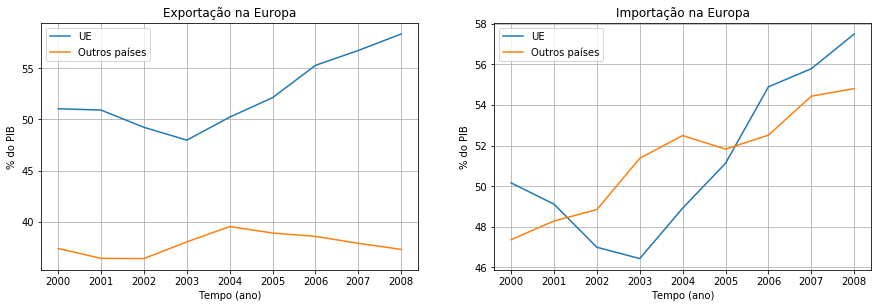

In [88]:
ExpoEU_y = []
i=2000

while i<2009:
    ExpoEU_y.append(ExpoEU[i].mean())
    i +=1
    

ExpoRestEurope_y = []
i= 2000

while i<2009:
    ExpoRestEurope_y.append(ExpoRestEurope[i].mean())
    i +=1
    
ImpoEU_y = []
i=2000

while i<2009:
    ImpoEU_y.append(ImpoEU[i].mean())
    i +=1
    

ImpoRestEurope_y = []
i= 2000

while i<2009:
    ImpoRestEurope_y.append(ImpoRestEurope[i].mean())
    i +=1

x = []
i = 2000

while i<2009:
    x.append(i)
    i += 1

fig = plt.figure(figsize=(23, 10))
plt.subplot(231)    
plt.plot(x, ExpoEU_y, label = 'UE')
plt.plot(x, ExpoRestEurope_y, label = 'Outros países')
plt.legend()
plt.title('Exportação na Europa')
plt.xlabel('Tempo (ano)')
plt.grid(True)
plt.ylabel('% do PIB')

plt.subplot(232) 
plt.plot(x, ImpoEU_y, label = 'UE')
plt.plot(x, ImpoRestEurope_y, label = 'Outros países')
plt.legend()
plt.title('Importação na Europa')
plt.xlabel('Tempo (ano)')
plt.grid(True)
plt.ylabel('% do PIB')
plt.show()

In [89]:
data2000.head()

,2000_Expo,2000_Impo,2000_PIB
country,,,
Latvia,36.9,44.9,11200
Turkey,19.4,22.6,13900
Poland,27.2,33.6,14700
Slovakia,54.1,56.6,15600
Estonia,61.6,64.9,15700


In [90]:
PIBEU_y = []
i=2000

while i<2009:
    PIBEU_y.append(PIBEU[i].mean())
    i +=1
    

PIBRestEurope_y = []
i= 2000

while i<2009:
    PIBRestEurope_y.append(PIBRestEurope[i].mean())
    i +=1

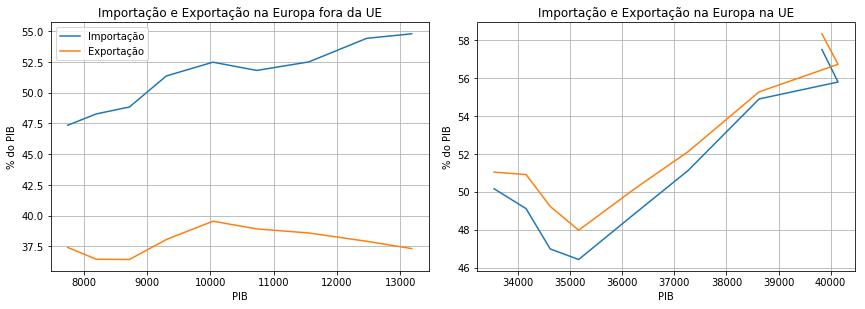

In [91]:
fig = plt.figure(figsize=(18, 8))
plt.subplot(231)
plt.plot(PIBRestEurope_y, ImpoRestEurope_y, label='Importação')
plt.plot(PIBRestEurope_y, ExpoRestEurope_y, label='Exportação')
plt.legend()
plt.title('Importação e Exportação na Europa fora da UE')
plt.xlabel('PIB')
plt.grid(True)
plt.ylabel('% do PIB')

plt.subplot(232)
plt.plot(PIBEU_y, ImpoEU_y, label='Importação')
plt.plot(PIBEU_y, ExpoEU_y, label='Exportação')
plt.title('Importação e Exportação na Europa na UE')
plt.xlabel('PIB')
plt.grid(True)
plt.ylabel('% do PIB')

plt.tight_layout()
plt.show()

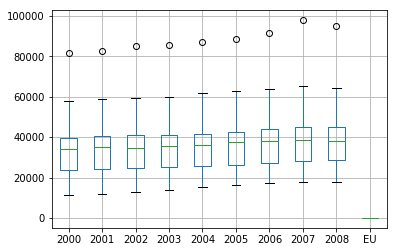

In [92]:
PIBEU.boxplot()

In [93]:
PIBEU.sort_values(by=[2004], ascending=False)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,EU
country,,,,,,,,,,
Luxembourg,81700,82800,85000,85400,87200,88600,91700,97900,94900,1
Norway,58100,59000,59500,59700,61700,62900,63900,65100,64500,1
SanMarino,51400,53100,52000,52600,53700,53900,55200,56600,54400,1
Monaco,50200,50900,51100,51300,52200,52800,54600,60900,59900,1
Switzerland,50300,50700,50400,50100,51100,52400,54100,55800,56400,1
Ireland,40800,42600,44200,45100,47300,48900,50400,50800,47600,1
Denmark,42300,42500,42600,42600,43700,44600,46200,46400,45900,1
Netherlands,41700,42300,42100,42000,42700,43500,45000,46500,47100,1
Austria,38800,39200,39600,39700,40600,41200,42300,43700,44300,1
